In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [17]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_detailed_price_data(crypto_id, currency, days):
    """
    CoinGecko에서 상세 시간별 가격 데이터를 조회
    :param crypto_id: 'bitcoin', 'ethereum' 등
    :param currency: 'krw', 'usd'
    :param days: 몇일치 ('1', '7', '30', 등)
    :return: (datetime 리스트, 가격 리스트)
    """
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        'vs_currency': currency,
        'days': days,
        'interval': 'hourly'  # 'minutely'는 지원 안함. 1일은 기본 5분 간격으로 제공됨
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        prices = data.get("prices", [])

        time_list = []
        price_list = []

        for timestamp, price in prices:
            dt = datetime.fromtimestamp(timestamp / 1000)
            time_list.append(dt)
            price_list.append(price)

        return time_list, price_list

    except requests.RequestException as e:
        print(f"요청 오류: {e}")
        return [], []

def plot_detailed_graph(times, prices, crypto_id, currency):
    """
    시간 단위 가격 변화 그래프 출력
    """
    plt.figure(figsize=(12, 6))
    plt.plot(times, prices, color='blue', linewidth=2)
    plt.title(f"{crypto_id.capitalize()} 가격 변화 ({currency.upper()})", fontsize=14)
    plt.xlabel("시간", fontsize=12)
    plt.ylabel(f"가격 ({currency.upper()})", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# === 실행부 ===
if __name__ == "__main__":
    print("⏱ 시간 단위 가상화폐 시세 그래프")
    print("===============================")
    crypto = input("코인 ID (예: bitcoin, ethereum): ").lower()
    currency = input("통화 (krw 또는 usd): ").lower()
    days = input("조회할 일 수 (1, 7, 30 등): ").strip()

    time_list, price_list = get_detailed_price_data(crypto, currency, days)

    if time_list:
        plot_detailed_graph(time_list, price_list, crypto, currency)
    else:
        print("데이터를 가져오지 못했습니다.")


⏱ 시간 단위 가상화폐 시세 그래프
요청 오류: 401 Client Error: Unauthorized for url: https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=krw&days=2&interval=hourly
데이터를 가져오지 못했습니다.


📅 가상화폐 일 단위 가격 그래프


C:\Users\tj\AppData\Local\Temp\ipykernel_13648\3065318633.py:57: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_13648\3065318633.py:57: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_13648\3065318633.py:57: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_13648\3065318633.py:57: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_13648\3065318633.py:57: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_13648\3065318633.py:57: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu S

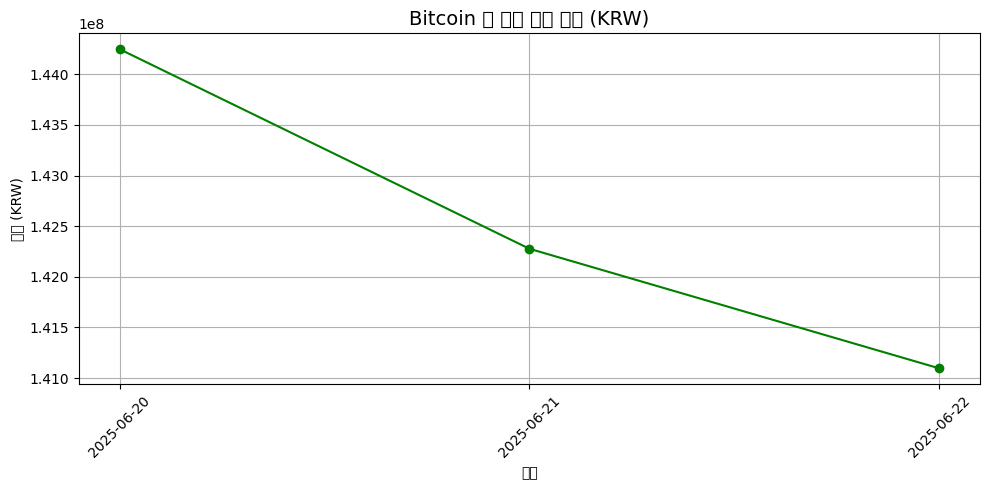

In [20]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def get_daily_price_data(crypto_id, currency, days):
    """
    CoinGecko에서 days일 간 일 단위 가격 데이터 조회
    :param crypto_id: 코인 ID (예: 'bitcoin')
    :param currency: 'krw', 'usd' 등
    :param days: 조회 기간 (숫자 또는 'max')
    :return: (날짜 리스트, 가격 리스트)
    """
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        'vs_currency': currency,
        'days': days
        # 'interval' 제거
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        prices = data.get("prices", [])

        dates = []
        price_list = []

        for timestamp, price in prices:
            # timestamp는 밀리초 단위
            date_str = datetime.fromtimestamp(timestamp / 1000).strftime('%Y-%m-%d')
            dates.append(date_str)
            price_list.append(price)

        # 중복 날짜가 있을 수 있으니, 날짜별 마지막 가격만 남김
        unique_dates = []
        unique_prices = []
        for i in range(len(dates)):
            if i == len(dates)-1 or dates[i] != dates[i+1]:
                unique_dates.append(dates[i])
                unique_prices.append(price_list[i])

        return unique_dates, unique_prices

    except requests.RequestException as e:
        print(f"데이터 요청 실패: {e}")
        return [], []

def plot_daily_price(dates, prices, crypto_id, currency):
    plt.figure(figsize=(10, 5))
    plt.plot(dates, prices, marker='o', linestyle='-', color='green')
    plt.title(f"{crypto_id.capitalize()} 일 단위 가격 변화 ({currency.upper()})", fontsize=14)
    plt.xlabel("날짜")
    plt.ylabel(f"가격 ({currency.upper()})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    print("📅 가상화폐 일 단위 가격 그래프")
    print("==============================")
    crypto = input("코인 ID (예: bitcoin): ").lower()
    currency = input("통화 (krw, usd): ").lower()
    days = input("조회 기간(예: 7, 30, max): ").lower()

    dates, prices = get_daily_price_data(crypto, currency, days)

    if dates and prices:
        plot_daily_price(dates, prices, crypto, currency)
    else:
        print("가격 데이터를 가져오지 못했습니다.")
